# Week 9

### Import libraries

In [12]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers, models, Input
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Load the data

In [ ]:
data_dir = 'data/kinect_good_preprocessed'

# List all CSV files that end with kinect.csv
csv_files = [f for f in os.listdir(data_dir) if f.endswith('kinect.csv')]

# Create an empty dataframe
all_data = pd.DataFrame()

# Load each CSV file and concatenate to the main dataframe
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    try:
        df = pd.read_csv(file_path)
        # Add a source column to track which file just to check
        # df['source_file'] = file

        # Append to the main dataframe
        all_data = pd.concat([all_data, df], ignore_index=True)

        print(f"Successfully loaded {file}")
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Drop the FrameNo column if it exists
if 'FrameNo' in all_data.columns:
    all_data = all_data.drop('FrameNo', axis=1)

# Check the dataframe after dropping FrameNo
print(f"Dataframe shape after dropping FrameNo: {all_data.shape}")

all_data.head()

Successfully loaded A100_kinect.csv
Successfully loaded A11_kinect.csv
Successfully loaded A26_kinect.csv
Successfully loaded A137_kinect.csv
Successfully loaded A73_kinect.csv
Successfully loaded B9_kinect.csv
Successfully loaded A155_kinect.csv
Successfully loaded A44_kinect.csv
Successfully loaded A90_kinect.csv
Successfully loaded A149_kinect.csv
Successfully loaded A58_kinect.csv
Successfully loaded B4_kinect.csv
Successfully loaded A158_kinect.csv
Successfully loaded A3_kinect.csv
Successfully loaded A49_kinect.csv
Successfully loaded B17_kinect.csv
Successfully loaded B20_kinect.csv
Successfully loaded A81_kinect.csv
Successfully loaded A144_kinect.csv
Successfully loaded A55_kinect.csv
Successfully loaded A62_kinect.csv
Successfully loaded A37_kinect.csv
Successfully loaded A126_kinect.csv
Successfully loaded A111_kinect.csv
Successfully loaded A84_kinect.csv
Successfully loaded B12_kinect.csv
Successfully loaded A6_kinect.csv
Successfully loaded B1_kinect.csv
Successfully load

,head_x,head_y,head_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_elbow_x,left_elbow_y,left_elbow_z,right_shoulder_x,...,left_knee_z,right_knee_x,right_knee_y,right_knee_z,left_foot_x,left_foot_y,left_foot_z,right_foot_x,right_foot_y,right_foot_z
0,-0.016480,0.77960,0.070646,-0.16221,0.58030,0.047752,-0.23056,0.84519,-0.033909,0.17278,...,-0.046769,0.13624,-0.51948,0.003528,-0.13975,-0.86193,-0.025068,0.15162,-0.91701,-0.005627
1,-0.016990,0.77937,0.069989,-0.16242,0.58031,0.047168,-0.23050,0.84547,-0.034061,0.17334,...,-0.045948,0.13663,-0.51921,0.003291,-0.13982,-0.86208,-0.024980,0.15001,-0.91352,-0.001491
2,-0.017345,0.77928,0.069703,-0.16258,0.58039,0.046964,-0.23044,0.84564,-0.034175,0.17310,...,-0.039191,0.13633,-0.51957,0.003223,-0.13937,-0.86233,-0.024777,0.14981,-0.91385,-0.001252
3,-0.017602,0.77935,0.069520,-0.16276,0.58035,0.046524,-0.23037,0.84598,-0.034318,0.17349,...,-0.044046,0.13653,-0.51892,0.002961,-0.13907,-0.86225,-0.024431,0.15711,-0.92048,-0.014920
4,-0.017559,0.77938,0.069530,-0.16279,0.58030,0.046288,-0.22906,0.85070,-0.036518,0.17365,...,-0.047814,0.13662,-0.51940,0.002998,-0.13917,-0.86364,-0.025274,0.15212,-0.91871,-0.004539


### Split the data into features (x and y coordinates) and targets (z coordinates):

In [3]:
# Extract column names for x, y, and z coordinates
x_columns = [col for col in all_data.columns if col.endswith('_x')]
y_columns = [col for col in all_data.columns if col.endswith('_y')]
z_columns = [col for col in all_data.columns if col.endswith('_z')]

print(f"Number of x columns: {len(x_columns)}")
print(f"Number of y columns: {len(y_columns)}")
print(f"Number of z columns: {len(z_columns)}")

# Display the column names to verify
print("\nX columns:", x_columns)
print("\nY columns:", y_columns)
print("\nZ columns:", z_columns)

Number of x columns: 13
Number of y columns: 13
Number of z columns: 13

X columns: [' head_x', 'left_shoulder_x', 'left_elbow_x', 'right_shoulder_x', 'right_elbow_x', 'left_hand_x', 'right_hand_x', 'left_hip_x', 'right_hip_x', 'left_knee_x', 'right_knee_x', 'left_foot_x', 'right_foot_x']

Y columns: ['head_y', 'left_shoulder_y', 'left_elbow_y', 'right_shoulder_y', 'right_elbow_y', 'left_hand_y', 'right_hand_y', 'left_hip_y', 'right_hip_y', 'left_knee_y', 'right_knee_y', 'left_foot_y', 'right_foot_y']

Z columns: ['head_z', 'left_shoulder_z', 'left_elbow_z', 'right_shoulder_z', 'right_elbow_z', 'left_hand_z', 'right_hand_z', 'left_hip_z', 'right_hip_z', 'left_knee_z', 'right_knee_z', 'left_foot_z', 'right_foot_z']


### Create the input features and target variables:

In [4]:
# Combine x and y coordinates for input features
X = all_data[x_columns + y_columns].values

# Z coordinates are the target
y = all_data[z_columns].values

print(f"Features shape (X): {X.shape}")
print(f"Targets shape (y): {y.shape}")

Features shape (X): (24005, 26)
Targets shape (y): (24005, 13)


 ### Split the data into training and testing sets:

In [6]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training targets shape: {y_train.shape}")
print(f"Testing targets shape: {y_test.shape}")

Training features shape: (19204, 26)
Testing features shape: (4801, 26)
Training targets shape: (19204, 13)
Testing targets shape: (4801, 13)


### Normalize the data.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
# Normalize the input features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Normalize the output targets
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Check the mean and standard deviation of the scaled data
print("X_train_scaled mean:", X_train_scaled.mean())
print("X_train_scaled std:", X_train_scaled.std())
print("y_train_scaled mean:", y_train_scaled.mean())
print("y_train_scaled std:", y_train_scaled.std())

X_train_scaled mean: 3.628591578177891e-15
X_train_scaled std: 1.0
y_train_scaled mean: 7.568436234972115e-16
y_train_scaled std: 1.0


### Define a simple neural network mode

In [ ]:
# Define the model using the functional API
inputs = Input(shape=(X_train_scaled.shape[1],))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(y_train_scaled.shape[1])(x)

model = models.Model(inputs=inputs, outputs=outputs)

# Display the model architecture
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 26)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 13)             │           845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,557 (49.05 KB)

 Trainable params: 12,557 (49.05 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [14]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',        # Mean Squared Error for regression
    metrics=['mae']    # Mean Absolute Error as an additional metric
)

### Train the model

In [16]:


# Train the model
history = model.fit(
    X_train_scaled, y_train_scaled,  # Training data
    epochs=100,                      # Maximum number of epochs to train
    batch_size=32,                   # Number of samples per gradient update
    validation_split=0.2,            # Use 20% of training data for validation
    verbose=1                        # Show progress
)

Epoch 1/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - loss: 0.5629 - mae: 0.5578 - val_loss: 0.2536 - val_mae: 0.3604
Epoch 2/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.2675 - mae: 0.3811 - val_loss: 0.1788 - val_mae: 0.3046
Epoch 3/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.2134 - mae: 0.3419 - val_loss: 0.1417 - val_mae: 0.2737
Epoch 4/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.1751 - mae: 0.3121 - val_loss: 0.1204 - val_mae: 0.2549
Epoch 5/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.1562 - mae: 0.2947 - val_loss: 0.1143 - val_mae: 0.2511
Epoch 6/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.1417 - mae: 0.2817 - val_loss: 0.1046 - val_mae: 0.2373
Epoch 7/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.1303 - mae: 0.2711 - val_loss: 0.0931 - val_mae: 0.2227
Epoch 8/100
481/481 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.1243 - mae: 0.2625 - val_loss: 0.0889 - val_mae: 0.2171
Epoch 9/100
481/481 ━━━━━━━━━━━━

### Analyze the training history

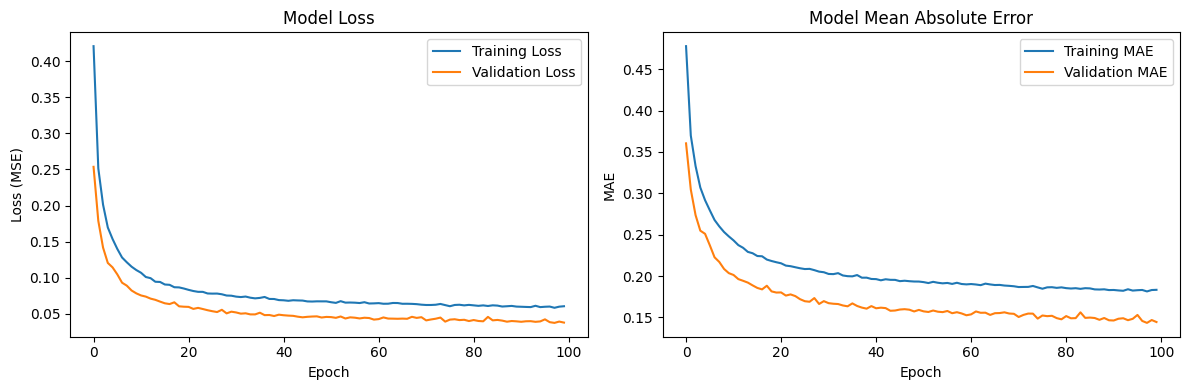

In [17]:
# Plot the loss curves
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

### Evaluating the model

In [18]:
# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=1)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 0.0346 - mae: 0.1402
Test Loss (MSE): 0.0347
Test MAE: 0.1401


### Predictions

In [19]:
# Make predictions on test data
predictions_scaled = model.predict(X_test_scaled)

# Transform predictions back to original scale
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Calculate error for each joint (each z coordinate)
joint_errors = np.mean(np.abs(predictions - y_test_original), axis=0)

# Display average error for each joint
for i, joint_name in enumerate([col.replace('_z', '') for col in z_columns]):
    print(f"{joint_name}: {joint_errors[i]:.4f}")

# Calculate overall average error
print(f"Overall average error: {np.mean(joint_errors):.4f}")

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step
head: 0.0140
left_shoulder: 0.0110
left_elbow: 0.0155
right_shoulder: 0.0109
right_elbow: 0.0155
left_hand: 0.0210
right_hand: 0.0214
left_hip: 0.0131
right_hip: 0.0131
left_knee: 0.0125
right_knee: 0.0131
left_foot: 0.0105
right_foot: 0.0107
Overall average error: 0.0140


### Visualize these errors

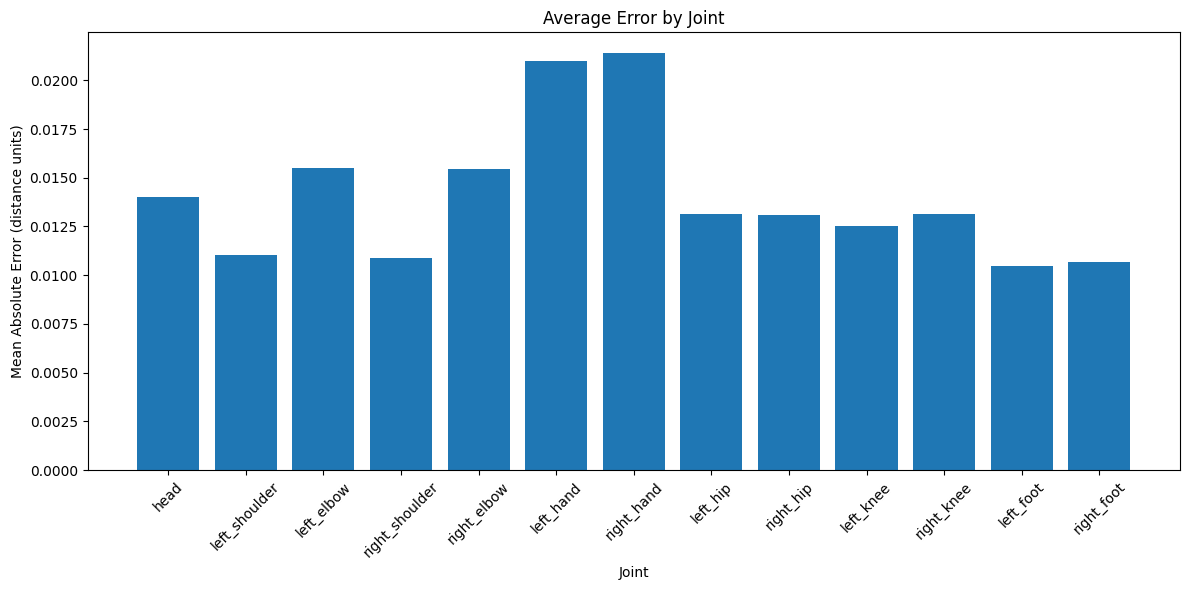

In [20]:
# Visualize errors by joint
plt.figure(figsize=(12, 6))
joint_names = [col.replace('_z', '') for col in z_columns]
plt.bar(joint_names, joint_errors)
plt.title('Average Error by Joint')
plt.ylabel('Mean Absolute Error (distance units)')
plt.xlabel('Joint')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()